In [1]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import os, warnings
warnings.filterwarnings(action='ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
print(X_org.shape)

(1000, 3)


In [6]:
w = rnd.normal(size=3)
print(w.shape)

(3,)


In [7]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [8]:
print(y.shape)

(1000,)


In [9]:
y

array([ 2.92614361e+00,  4.74436373e+00,  1.43948780e+00,  5.69621088e-01,
        1.23092405e+00,  1.40483870e+00,  3.05343393e-01,  1.61798577e+00,
        2.78397106e+00,  4.05268238e-01,  5.63583108e-01, -3.37171612e+00,
        2.68835394e+00, -9.15412896e-01, -1.55075704e+00, -1.49947758e+00,
       -2.58985170e+00,  4.61102309e-01,  1.91084568e-01,  1.62696476e-01,
       -1.18280471e+00, -2.60353559e+00, -2.23028347e+00,  4.82646490e-01,
        1.06704104e+00, -1.52006091e+00, -3.31051378e-01,  1.87597574e+00,
        3.31447260e+00, -1.01635156e+00,  2.90159141e-02,  1.67783329e+00,
        1.01786417e+00,  1.86576998e+00, -1.33860517e+00,  2.94705987e+00,
        3.69196341e+00,  7.35101018e-01, -7.90758525e-02, -3.31351602e-03,
       -5.96493955e-02,  1.73541057e+00,  2.81429991e-01,  1.49592629e-01,
       -9.83497546e-01,  1.42951094e+00,  1.80028159e-01,  7.22159282e-01,
        4.43865465e+00,  1.08417202e+00,  9.50953613e-01, -1.29677521e+00,
        1.31222835e+00, -

In [11]:
X.shape

(1000, 3)

In [10]:
print("값들의 출현 횟수: ", np.bincount(X[:,0]))

값들의 출현 횟수:  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

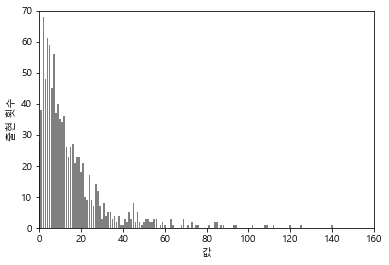

In [12]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

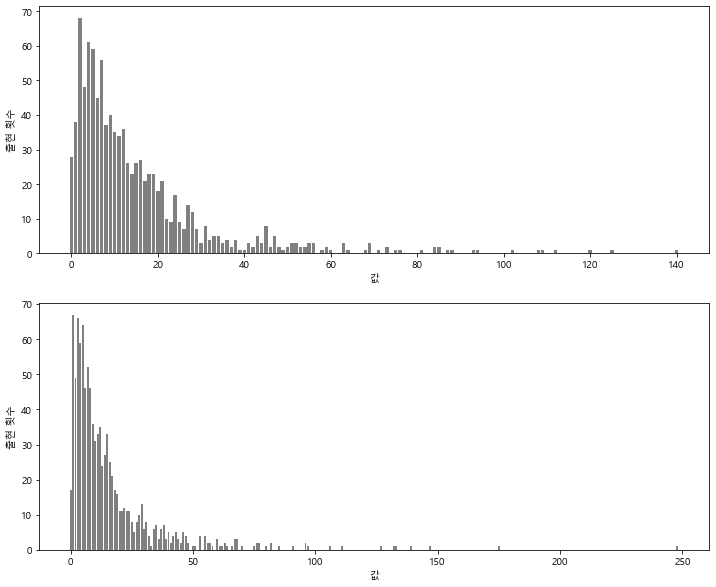

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Ridge().fit(X_train, y_train)
model.score(X_test, y_test)

0.6224186236310756

In [16]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값(log적용)')

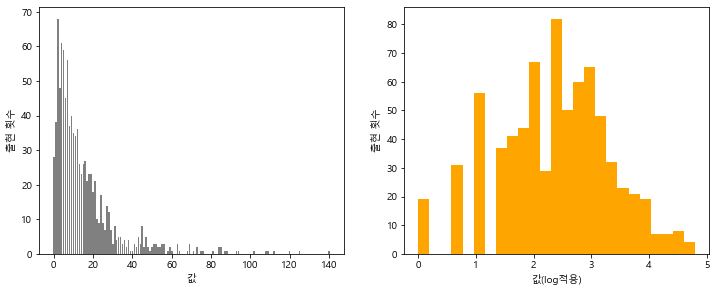

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [18]:
model = Ridge().fit(X_train_log, y_train)
model.score(X_test_log, y_test)

0.8749342372887815